# Sami Adham (DAND- Wrangling and Analyzing Data)

# Project Details
Your tasks in this project are as follows:

* Data wrangling, which consists of:
    1. Gathering data
    2. Assessing data
    3. Cleaning data
* Storing, analyzing, and visualizing your wrangled data
* Reporting on 
    1. your data wrangling efforts and 
    2. your data analyses and visualizations
    
# Tools
We going to used the following:
* Anaconda Jupyter Notebook
* world to write report 
* Python Libraries



# Gathering Data

In [1]:
#Import all library that we going to use it in the project
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import requests
import time
import json
%matplotlib inline

In [2]:
#1.1 extract twitter archive enhanced from CSV file
twitter_archive=pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1057,742150209887731712,NaN,NaN,2016-06-13 00:22:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Edmund. He sends stellar selfies. Cute...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/742150209...,8,10,Edmund,None,None,pupper,None
932,754011816964026368,NaN,NaN,2016-07-15 17:56:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He pouts until he gets to go ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/754011816...,12,10,Charlie,None,None,None,None
677,789280767834746880,NaN,NaN,2016-10-21 01:42:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Meyer. He has to hold s...,7.507196e+17,4.196984e+09,2016-07-06 15:54:42 +0000,https://twitter.com/dog_rates/status/750719632...,12,10,Meyer,None,None,None,None
2302,667012601033924608,NaN,NaN,2015-11-18 16:12:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Klevin. He laughs a lot. Very cool dog...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667012601...,9,10,Klevin,None,None,None,None
1029,745712589599014916,NaN,NaN,2016-06-22 20:18:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Percy. He fell asleep at the wheel. Ir...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/745712589...,7,10,Percy,None,None,None,None
1240,712085617388212225,NaN,NaN,2016-03-22 01:16:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Olive and Ruby. They are best bud...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/712085617...,11,10,Olive,None,None,None,None
228,848213670039564288,8.482121e+17,4.196984e+09,2017-04-01 16:41:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Jerry just apuppologized to me. He said there ...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
1343,704761120771465216,NaN,NaN,2016-03-01 20:11:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper killed this great white in an epic...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704761120...,13,10,None,None,None,pupper,None
1890,674767892831932416,NaN,NaN,2015-12-10 01:49:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pup was carefully tossed to make it look ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674767892...,12,10,None,None,None,None,None
2171,669328503091937280,NaN,NaN,2015-11-25 01:35:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kirk. He just saw a bacon wrapped tenn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669328503...,12,10,Kirk,None,None,None,None


In [3]:
# 1.2 Extract images as .tsv from UDACITY server to 

In [4]:
#by using request library we can gathering data 
#url from udacity server
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)
with open(os.path.join('image_predictions.tsv'),mode='wb') as file:
    file.write(response.content)
img_predications=pd.read_csv('image_predictions.tsv',sep='\t')
img_predications.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
img_predications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [6]:
#since we could not create API application user in twitter. Unfortunately we going to read from Prepared json files from udacity
tweet_json=pd.read_json('tweet_json.json',lines=True,encoding='utf-8')
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
created_at                       2354 non-null datetime64[ns, UTC]
id                               2354 non-null int64
id_str                           2354 non-null int64
full_text                        2354 non-null object
truncated                        2354 non-null bool
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
source                           2354 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
in_reply_to_screen_name          78 non-null object
user                             2354 non-null object
geo                              0 non-null float64
coordinates                 

In [7]:
#This code won't be running it.Since the twitter developer account was not approved

#import tweepy
#from tweepy import OAuthHandler
#import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'

#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
#tweet_ids = df_1.tweet_id.values
#len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    #for tweet_id in tweet_ids:
      #  count += 1
      #  print(str(count) + ": " + str(tweet_id))
       # try:
       #     tweet = api.get_status(tweet_id, tweet_mode='extended')
       #     print("Success")
       #     json.dump(tweet._json, outfile)
        #    outfile.write('\n')
       # except tweepy.TweepError as e:
        #    print("Fail")
        #    fails_dict[tweet_id] = e
        #    pass
#end = timer()
#print(end - start)
#print(fails_dict)

### Our gathred files
* twitter_archive
* img_predications
* tweet_json

# Assessing

In [8]:
# assess furst file which is twitter_archive
twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
376,828046555563323392,NaN,NaN,2017-02-05 01:04:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sailer. He waits on the roof for his o...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/828046555...,13,10,Sailer,None,None,None,None
842,766793450729734144,NaN,NaN,2016-08-20 00:26:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rufus. He just missed out on the 100m ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/766793450...,10,10,Rufus,None,None,None,None
1572,687664829264453632,NaN,NaN,2016-01-14 15:57:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Opal. He's a Belgian Dijon Poofster. Upse...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687664829...,11,10,Opal,None,None,None,None
1306,707377100785885184,NaN,NaN,2016-03-09 01:26:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This dog just brutally murdered a snowman. Cur...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707377100...,9,10,None,None,None,None,None
930,754449512966619136,NaN,NaN,2016-07-16 22:55:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dex. He can see into your past and fut...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/754449512...,11,10,Dex,None,None,None,None
1786,677573743309385728,NaN,NaN,2015-12-17 19:39:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sandy. He's sexually confused. Thinks ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677573743...,10,10,Sandy,None,None,None,None
1827,676430933382295552,NaN,NaN,2015-12-14 15:57:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Duke. He's an Urban Parmesan. They know h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676430933...,10,10,Duke,None,None,None,None
1565,688064179421470721,NaN,NaN,2016-01-15 18:24:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kilo. He's a Pouncing Brioche. Really ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688064179...,11,10,Kilo,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
1384,700796979434098688,NaN,NaN,2016-02-19 21:39:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Daniel. He's a neat pup. Exotic af. Cu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700796979...,7,10,Daniel,None,None,None,None


In [9]:
#twitter_archive info
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
#check if there is duplication 
sum(twitter_archive.duplicated())

0

In [11]:
#check Sources
twitter_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [12]:
#check if all tweet_id is unique
twitter_archive['tweet_id'].nunique()

2356

In [13]:
#check names
twitter_archive['name'].value_counts()

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
          ... 
Charl        1
Jarvis       1
Daniel       1
Linus        1
Bradlay      1
Name: name, Length: 957, dtype: int64

In [14]:
#check Wearied name
twitter_archive[twitter_archive['name'].apply(len)<3]['name'].value_counts()

a     55
Bo     9
an     7
Al     1
my     1
Ed     1
Mo     1
by     1
O      1
JD     1
Jo     1
Name: name, dtype: int64

In [15]:
#I notice the DOG STAGE should be written in the text as below
twitter_archive[twitter_archive['pupper']=='pupper']['text']

29      This is Roscoe. Another pupper fallen victim t...
49      This is Gus. He's quite the cheeky pupper. Alr...
56      Here is a pupper approaching maximum borkdrive...
78      RT @rachel2195: @dog_rates the boyfriend and h...
82      This is Ginger. She's having a ruff Monday. To...
                              ...                        
1995    Meet Scott. Just trying to catch his train to ...
2002    Say hello to Jazz. She should be on the cover ...
2009    This is Rolf. He's having the time of his life...
2015    This is Opal. He's a Royal John Coctostan. Rea...
2017    This is Bubba. He's a Titted Peebles Aorta. Ev...
Name: text, Length: 257, dtype: object

In [16]:
img_predications.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
973,706681918348251136,https://pbs.twimg.com/media/Cc6jcYRXIAAFuox.jpg,1,toy_poodle,0.717584,True,miniature_poodle,0.151433,True,Norwich_terrier,0.047087,True
1911,853639147608842240,https://pbs.twimg.com/media/C9i8RhhXoAAdkMT.jpg,1,German_shepherd,0.509879,True,malinois,0.237311,True,kelpie,0.046916,True
1684,814153002265309185,https://pbs.twimg.com/media/C0xz04SVIAAeyDb.jpg,1,golden_retriever,0.490068,True,Labrador_retriever,0.291956,True,chow,0.072475,True
1081,718246886998687744,https://pbs.twimg.com/media/Cfe5tLWXEAIaoFO.jpg,1,Chihuahua,0.354488,True,carton,0.159672,False,Siberian_husky,0.057498,True
726,686358356425093120,https://pbs.twimg.com/media/CYZvRttWYAE_RXc.jpg,1,pug,0.985237,True,bull_mastiff,0.008841,True,boxer,0.002321,True
561,677895101218201600,https://pbs.twimg.com/media/CWhd_7WWsAAaqWG.jpg,1,dalmatian,0.550702,True,kuvasz,0.060226,True,Great_Pyrenees,0.058631,True
588,679111216690831360,https://pbs.twimg.com/ext_tw_video_thumb/67911...,1,kelpie,0.189423,True,beagle,0.121988,True,basset,0.121171,True
1592,798673117451325440,https://pbs.twimg.com/media/CV_cnjHWUAADc-c.jpg,1,dough,0.806757,False,bakery,0.027907,False,French_loaf,0.018189,False
1736,821813639212650496,https://pbs.twimg.com/media/CtVAvX-WIAAcGTf.jpg,1,Saint_Bernard,0.995143,True,Cardigan,0.003044,True,English_springer,0.001050,True
1147,730924654643314689,https://pbs.twimg.com/media/CiTEFjDXAAAqU6I.jpg,1,polecat,0.185382,False,mink,0.105282,False,Newfoundland,0.086241,True


In [17]:
img_predications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
#check if there is duplication 
sum(img_predications.duplicated())

0

In [19]:
#check if all tweet_id is unique in img_prediction
img_predications['tweet_id'].nunique()

2075

In [20]:
tweet_json.sample(10)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
282,2017-03-07 03:22:35+00:00,838952994649550848,838952994649550848,SHE MISPLACED HER HOOMAN 13/10 MISTAKES HAPPEN...,False,"[0, 46]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,21289,False,False,0.0,0.0,en,NaN,8.389487e+17,8.389487e+17,{'created_at': 'Tue Mar 07 03:05:35 +0000 2017...
936,2016-07-13 18:26:16+00:00,753294487569522689,753294487569522688,This is Ace. He's a window washer. One of the ...,False,"[0, 75]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 753294480162295809, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,3758,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2341,2015-11-16 01:59:36+00:00,666073100786774016,666073100786774016,Let's hope this flight isn't Malaysian (lol). ...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666073098362486784, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,335,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
284,2017-03-07 00:57:32+00:00,838916489579200512,838916489579200512,RT @KibaDva: I collected all the good dogs!! 1...,False,"[0, 95]","{'hashtags': [{'text': 'GoodDogs', 'indices': ...","{'media': [{'id': 838905954309529600, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,0.0,0.0,en,{'created_at': 'Tue Mar 07 00:15:46 +0000 2017...,NaN,NaN,NaN
2169,2015-11-25 01:35:25+00:00,669328503091937280,669328503091937280,This is Kirk. He just saw a bacon wrapped tenn...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 669328496653635584, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1081,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1988,2015-12-04 04:56:09+00:00,672640509974827008,672640509974827008,This is Leonidas. He just got rekt by a snowba...,False,"[0, 89]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 672640493281411072, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1032,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2137,2015-11-27 00:31:29+00:00,670037189829525505,670037189829525504,Awesome dog here. Not sure where it is tho. Sp...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 670037180094488576, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,625,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2033,2015-12-01 17:00:19+00:00,671735591348891648,671735591348891648,This is Oscar. He's ready for Christmas. 11/10...,False,"[0, 70]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 671735585762054145, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1534,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
742,2016-09-26 17:29:48+00:00,780459368902959104,780459368902959104,"This is Bear. Don't worry, he's not a real bea...",False,"[0, 112]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 780459363064549377, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,5892,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1789,2015-12-17 03:53:20+00:00,677335745548390400,677335745548390400,Downright inspiring 12/10 https://t.co/vSLtYBWHcQ,False,"[0, 49]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",NaN,...,3328,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [21]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
created_at                       2354 non-null datetime64[ns, UTC]
id                               2354 non-null int64
id_str                           2354 non-null int64
full_text                        2354 non-null object
truncated                        2354 non-null bool
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
source                           2354 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
in_reply_to_screen_name          78 non-null object
user                             2354 non-null object
geo                              0 non-null float64
coordinates                 

In [22]:
#check if there is duplication 
tweet_json['id'].nunique()

2354

In [23]:
tweet_json['retweet_count'].sort_values(ascending=False )

1037    79515
533     56625
259     56625
1077    52360
816     52360
        ...  
112         3
341         3
273         3
1293        2
290         0
Name: retweet_count, Length: 2354, dtype: int64

In [24]:
tweet_json['favorite_count'].sort_values(ascending=False )

412     132810
1037    131075
65      107956
533     107015
134     106827
         ...  
909          0
588          0
164          0
585          0
484          0
Name: favorite_count, Length: 2354, dtype: int64

### Quality Issues

#### twitter_archive(2356 record)
    1. Remove Retweets
    2. Remove all column in json file except [id,favorite_count,retweet_count] since we need it.
    3. Some inaccurate names usually start with lowercase
    4. Fix names with Unfamiliar name by convert it to nan
    5. Calculate Rating_Score rather than numerator and denominators
    6. Fix Rating Numerator
    7. Rename all column to make it easy to read and remove extra columns as need it
    8. change data type

#### img_predications(2075)
    * missing Value

#### tweet_json(2354)
    * missing Value

### Tidiness
    1. Join all Data frames togather in One DataFrame which is twitter_archive using tweet_id
    2. Doge Stages should not be in column

    



# Cleaning

# Tidiness Problem 1

__Define__

1.1 Join all Dataframes togather in One DataFrame which is twitter_archive using tweet_id

__Code__

In [25]:
# first lets take a copy from all Dataframes as following
tw_archive_clean=twitter_archive.copy()
img_pre_clean=img_predications.copy()
tw_json_clean=tweet_json.copy()

In [26]:
#Create function to merage two dataframe to gather
def myMerge(tw1,tw2,id1,id2):
    tw_archive=pd.merge(left=tw1,right=tw2,left_on=id1,right_on=id2,how='inner')
    return tw_archive

#Merge two tables at the time
tw_archive_clean=myMerge(tw_archive_clean,tw_json_clean,'tweet_id','id')
tw_archive_clean=myMerge(tw_archive_clean,img_pre_clean,'tweet_id','tweet_id')

__Test__

In [27]:
tw_archive_clean.sample(5)

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
482,798665375516884993,NaN,NaN,2016-11-15 23:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lola. She fell asleep o...,6.718968e+17,4.196984e+09,2015-12-02 03:40:57 +0000,https://twitter.com/dog_rates/status/671896809...,...,1,chow,0.243529,True,hamster,0.227150,False,Pomeranian,0.056057,True
603,779123168116150273,NaN,NaN,2016-09-23 01:00:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Reggie. He hugs everyone he meets. 12/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/779123168...,...,1,toy_poodle,0.431080,True,soft-coated_wheaten_terrier,0.060365,True,cocker_spaniel,0.059845,True
1020,714141408463036416,NaN,NaN,2016-03-27 17:25:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I know we only rate dogs, but since it's Easte...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/714141408...,...,1,Labrador_retriever,0.586951,True,golden_retriever,0.378812,True,redbone,0.003605,True
1873,669661792646373376,NaN,NaN,2015-11-25 23:39:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a brave dog. Excellent free climber. T...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669661792...,...,1,weasel,0.262802,False,Siamese_cat,0.148263,False,hamster,0.116374,False
575,783695101801398276,NaN,NaN,2016-10-05 15:47:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Loomis. He's the leader of the Kenneth...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/783695101...,...,3,chow,0.314265,True,golden_retriever,0.300435,True,Australian_terrier,0.049487,True


In [28]:
tw_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 59 columns):
tweet_id                         2073 non-null int64
in_reply_to_status_id_x          23 non-null float64
in_reply_to_user_id_x            23 non-null float64
timestamp                        2073 non-null object
source_x                         2073 non-null object
text                             2073 non-null object
retweeted_status_id              79 non-null float64
retweeted_status_user_id         79 non-null float64
retweeted_status_timestamp       79 non-null object
expanded_urls                    2073 non-null object
rating_numerator                 2073 non-null int64
rating_denominator               2073 non-null int64
name                             2073 non-null object
doggo                            2073 non-null object
floofer                          2073 non-null object
pupper                           2073 non-null object
puppo                            2073 

__Define__

1.2 Doge Stages should not be in column

__Code__

# Tidiness Problem 2

__Define__

Doge Stages should not be in column

__Code__

In [29]:
# Select the columns to melt and to remain
#Melt_Col = ['doggo', 'floofer', 'pupper', 'puppo']
#mycol = []
#for x in tw_archive_clean.columns.tolist():
 #   if x not in Melt_Col:
   #     mycol.append(x)


# Melt the the columns into values
#tw_archive_clean = pd.melt(tw_archive_clean, id_vars = mycol, value_vars = Melt_Col, 
 #                        var_name = 'stages', value_name = 'dog_stage')
# Delete column 'stages'
#tw_archive_clean = tw_archive_clean.drop('stages', 1)

tw_archive_clean.doggo.replace('None', '', inplace=True) and df.doggo.replace(np.NaN, '', inplace=True)
tw_archive_clean.pupper.replace('None', '', inplace=True) and df.doggo.replace(np.NaN, '', inplace=True)
tw_archive_clean.puppo.replace('None', '', inplace=True) and df.doggo.replace(np.NaN, '', inplace=True)
tw_archive_clean.floofer.replace('None', '', inplace=True) and df.doggo.replace(np.NaN, '', inplace=True)

In [30]:
tw_archive_clean['dog_stage'] = tw_archive_clean.doggo + tw_archive_clean.floofer + tw_archive_clean.pupper + tw_archive_clean.puppo
#I need to Separate the combined name
tw_archive_clean.loc[tw_archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
tw_archive_clean.loc[tw_archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
tw_archive_clean.loc[tw_archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

In [31]:
tw_archive_clean['dog_stage'].value_counts()

                  1753
pupper             210
doggo               67
puppo               23
doggo, pupper       11
floofer              7
doggo, floofer       1
doggo, puppo         1
Name: dog_stage, dtype: int64

In [32]:
print(tw_archive_clean.dog_stage.value_counts())
print(len(tw_archive_clean))

                  1753
pupper             210
doggo               67
puppo               23
doggo, pupper       11
floofer              7
doggo, floofer       1
doggo, puppo         1
Name: dog_stage, dtype: int64
2073


__Test__

In [33]:
tw_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 60 columns):
tweet_id                         2073 non-null int64
in_reply_to_status_id_x          23 non-null float64
in_reply_to_user_id_x            23 non-null float64
timestamp                        2073 non-null object
source_x                         2073 non-null object
text                             2073 non-null object
retweeted_status_id              79 non-null float64
retweeted_status_user_id         79 non-null float64
retweeted_status_timestamp       79 non-null object
expanded_urls                    2073 non-null object
rating_numerator                 2073 non-null int64
rating_denominator               2073 non-null int64
name                             2073 non-null object
doggo                            2073 non-null object
floofer                          2073 non-null object
pupper                           2073 non-null object
puppo                            2073 

#  Quality Issues #1

__Define__

Keep columns when 'retweeted_status_id' is NaN  and Remove unused columns

__Code__

In [37]:
# Keep columns where 'retweeted_status_id' is NaN
tw_archive_clean = tw_archive_clean[np.isnan(tw_archive_clean.retweeted_status_id)]

# Remove unused columns
delete_retweet=['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp']
tw_archive_clean.drop(delete_retweet,1,inplace=True)

AttributeError: 'DataFrame' object has no attribute 'retweeted_status_id'

__Test__

In [38]:
tw_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 57 columns):
tweet_id                         1994 non-null int64
in_reply_to_status_id_x          23 non-null float64
in_reply_to_user_id_x            23 non-null float64
timestamp                        1994 non-null object
source_x                         1994 non-null object
text                             1994 non-null object
expanded_urls                    1994 non-null object
rating_numerator                 1994 non-null int64
rating_denominator               1994 non-null int64
name                             1994 non-null object
doggo                            1994 non-null object
floofer                          1994 non-null object
pupper                           1994 non-null object
puppo                            1994 non-null object
created_at                       1994 non-null datetime64[ns, UTC]
id                               1994 non-null int64
id_str                

#  Quality Issues #2

__Define__

Remove all column in json file except [id,favorite_count,retweet_count] since we need it.

__Code__

In [39]:
delete_unused_json=['id','created_at','id_str','full_text','truncated','display_text_range','entities','extended_entities','in_reply_to_status_id_y'
                   ,'in_reply_to_status_id_str','in_reply_to_user_id_y','in_reply_to_user_id_str','in_reply_to_screen_name'
                   ,'user','geo','coordinates','place','contributors','is_quote_status','favorited','retweeted','possibly_sensitive'
                    ,'possibly_sensitive_appealable','source_y','lang','retweeted_status','quoted_status_id','quoted_status_id_str','quoted_status']


tw_archive_clean.drop(delete_unused_json,1,inplace=True)

In [42]:
tw_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 28 columns):
tweet_id                   1994 non-null int64
in_reply_to_status_id_x    23 non-null float64
in_reply_to_user_id_x      23 non-null float64
timestamp                  1994 non-null object
source_x                   1994 non-null object
text                       1994 non-null object
expanded_urls              1994 non-null object
rating_numerator           1994 non-null int64
rating_denominator         1994 non-null int64
name                       1994 non-null object
doggo                      1994 non-null object
floofer                    1994 non-null object
pupper                     1994 non-null object
puppo                      1994 non-null object
retweet_count              1994 non-null int64
favorite_count             1994 non-null int64
jpg_url                    1994 non-null object
img_num                    1994 non-null int64
p1                         1994 non-n

#  Quality Issues #3

__Define__

 Remove all names with __Unfamiliar name__

__Code__

In [43]:
lowercase_list=[]
for name in tw_archive_clean['name']:
    #first letter in the name
    if name[0].islower():
        lowercase_list.append(name)
lowercase_list=np.array(lowercase_list)
print("Number of Item That we should removeis: ",lowercase_list.shape[0])
lowercase_list=np.unique(lowercase_list)
lowercase_list

Number of Item That we should removeis:  98


array(['a', 'actually', 'all', 'an', 'by', 'getting', 'his', 'incredibly',
       'infuriating', 'just', 'light', 'my', 'not', 'officially', 'one',
       'quite', 'space', 'such', 'the', 'this', 'unacceptable', 'very'],
      dtype='<U12')

In [44]:
    lowercase_list.shape[0]

22

In [45]:
#for sure we can increase quality by replace it by NAN

tw_archive_clean['name']=tw_archive_clean['name'].replace(lowercase_list,np.nan)

__Test__

In [46]:
#This name column was 2073 non-null but after cleaning it become 1973
tw_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 28 columns):
tweet_id                   1994 non-null int64
in_reply_to_status_id_x    23 non-null float64
in_reply_to_user_id_x      23 non-null float64
timestamp                  1994 non-null object
source_x                   1994 non-null object
text                       1994 non-null object
expanded_urls              1994 non-null object
rating_numerator           1994 non-null int64
rating_denominator         1994 non-null int64
name                       1896 non-null object
doggo                      1994 non-null object
floofer                    1994 non-null object
pupper                     1994 non-null object
puppo                      1994 non-null object
retweet_count              1994 non-null int64
favorite_count             1994 non-null int64
jpg_url                    1994 non-null object
img_num                    1994 non-null int64
p1                         1994 non-n

#  Quality Issues #4

__Define__

Some Unfamiliar names such as name with one letter, we will convert it to nan

__Code__

In [47]:
#check Wearied name again becouse it might deleted with lower case quality issue.
tw_archive_clean['name']=tw_archive_clean['name'].astype(str)
del_unfamiliar=tw_archive_clean[tw_archive_clean['name'].apply(len)<3]['name']
del_unfamiliar=np.array(del_unfamiliar)
del_unfamiliar



array(['Mo', 'Bo', 'Bo', 'Bo', 'O', 'Al', 'Bo', 'Bo', 'Bo', 'Ed', 'JD',
       'Jo'], dtype=object)

In [48]:
# replace all these unfamiliar names with nan
tw_archive_clean['name']=tw_archive_clean['name'].replace(del_unfamiliar,np.nan)

__Test__

In [49]:
tw_archive_clean['name']=tw_archive_clean['name'].astype(str)
del_unfamiliar=tw_archive_clean[tw_archive_clean['name'].apply(len)<3]['name']
del_unfamiliar=np.array(del_unfamiliar)
del_unfamiliar

array([], dtype=object)

In [50]:
tw_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 28 columns):
tweet_id                   1994 non-null int64
in_reply_to_status_id_x    23 non-null float64
in_reply_to_user_id_x      23 non-null float64
timestamp                  1994 non-null object
source_x                   1994 non-null object
text                       1994 non-null object
expanded_urls              1994 non-null object
rating_numerator           1994 non-null int64
rating_denominator         1994 non-null int64
name                       1994 non-null object
doggo                      1994 non-null object
floofer                    1994 non-null object
pupper                     1994 non-null object
puppo                      1994 non-null object
retweet_count              1994 non-null int64
favorite_count             1994 non-null int64
jpg_url                    1994 non-null object
img_num                    1994 non-null int64
p1                         1994 non-n

#  Quality Issues #5

__Define__

Fix Rating Numerator

__Code__

In [51]:
tw_archive_clean[tw_archive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]

/anaconda3/lib/python3.7/site-packages/pandas/core/strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
40,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,...,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True,
558,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,...,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True,
614,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,...,clumber,0.946718,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True,pupper
1451,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26,10,None,...,kuvasz,0.438627,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True,


In [52]:
# Set correct numerators for specific tweets
tw_archive_clean.loc[(tw_archive_clean['tweet_id'] == 883482846933004288) & (tw_archive_clean['rating_numerator'] == 5), ['rating_numerator']] = 13.5
tw_archive_clean.loc[(tw_archive_clean['tweet_id'] == 786709082849828864) & (tw_archive_clean['rating_numerator'] == 75), ['rating_numerator']] = 9.75
tw_archive_clean.loc[(tw_archive_clean['tweet_id'] == 778027034220126208) & (tw_archive_clean['rating_numerator'] == 27), ['rating_numerator']] = 11.27
tw_archive_clean.loc[(tw_archive_clean['tweet_id'] == 680494726643068929) & (tw_archive_clean['rating_numerator'] == 26), ['rating_numerator']] = 11.26

In [54]:
tw_archive_clean[tw_archive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
40,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,13.50,10,Bella,...,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True,
558,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,...,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True,
614,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,11.27,10,Sophie,...,clumber,0.946718,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True,pupper
1451,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,11.26,10,None,...,kuvasz,0.438627,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True,


#  Quality Issues #6

__Define__

Calculate Rating_Score rather than numerator and denominators

__Code__

In [55]:
#Convert it to Interger to do opration on it
tw_archive_clean['rating_numerator']=tw_archive_clean['rating_numerator'].astype(float)
tw_archive_clean['rating_denominator']=tw_archive_clean['rating_denominator'].astype(float)

In [56]:
tw_archive_clean['rating_Score']=tw_archive_clean['rating_numerator']/tw_archive_clean['rating_denominator']
tw_archive_clean['rating_Score'].describe()

count    1994.000000
mean        1.164875
std         4.064302
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max       177.600000
Name: rating_Score, dtype: float64

In [57]:
#remove Outlier
del_outlier=tw_archive_clean[tw_archive_clean['rating_Score']>10]


In [58]:
tw_archive_clean['rating_Score']=tw_archive_clean['rating_Score'].replace(del_outlier,np.nan)

__Test__

In [59]:
tw_archive_clean[tw_archive_clean['rating_Score']>10]

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,rating_Score
802,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776.0,10.0,Atticus,...,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False,,177.6
1795,670842764863651840,NaN,NaN,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,420.0,10.0,None,...,0.096063,False,accordion,0.094075,False,drumstick,0.061113,False,,42.0


In [60]:
#Also test the dataset
tw_archive_clean.sample(5)

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,rating_Score
1355,685663452032069632,NaN,NaN,2016-01-09 03:24:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Brooks. He's confused by the almighty bal...,https://twitter.com/dog_rates/status/685663452...,12.0,10.0,Brooks,...,0.171174,True,tennis_ball,0.090644,False,racket,0.048508,False,,1.2
323,823939628516474880,NaN,NaN,2017-01-24 17:04:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cash. He's officially given pup on tod...,https://twitter.com/dog_rates/status/823939628...,12.0,10.0,Cash,...,0.234076,True,curly-coated_retriever,0.193093,True,Labrador_retriever,0.095197,True,,1.2
300,828011680017821696,NaN,NaN,2017-02-04 22:45:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Brutus and Jersey. They think the...,https://twitter.com/dog_rates/status/828011680...,11.0,10.0,Brutus,...,0.936662,True,Staffordshire_bullterrier,0.032999,True,bull_mastiff,0.017183,True,,1.1
174,851224888060895234,NaN,NaN,2017-04-10 00:06:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Snoop. His number one passion is sticking...,https://twitter.com/dog_rates/status/851224888...,13.0,10.0,Snoop,...,0.971512,False,seat_belt,0.007063,False,standard_poodle,0.005683,True,,1.3
50,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,https://twitter.com/dog_rates/status/881536004...,14.0,10.0,nan,...,0.281463,True,Angora,0.272066,False,Persian_cat,0.114854,False,pupper,1.4


In [61]:
tw_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 29 columns):
tweet_id                   1994 non-null int64
in_reply_to_status_id_x    23 non-null float64
in_reply_to_user_id_x      23 non-null float64
timestamp                  1994 non-null object
source_x                   1994 non-null object
text                       1994 non-null object
expanded_urls              1994 non-null object
rating_numerator           1994 non-null float64
rating_denominator         1994 non-null float64
name                       1994 non-null object
doggo                      1994 non-null object
floofer                    1994 non-null object
pupper                     1994 non-null object
puppo                      1994 non-null object
retweet_count              1994 non-null int64
favorite_count             1994 non-null int64
jpg_url                    1994 non-null object
img_num                    1994 non-null int64
p1                         1994 n

#  Quality Issues #7

__Define__

Rename all column to make it easy to read and remove extra columns as need it

__Code__

In [62]:
# rename columns
tw_archive_clean.rename(columns={'source_x': 'source', 
                            'retweet_count': 'retweet', 
                            'favorite_count': 'favorite',
                            'rating_numerator': 'numerator', 
                            'rating_denominator': 'denominator'}, inplace=True)

# Drop undesired columns
tw_archive_clean.drop(['in_reply_to_status_id_x', 
                  'in_reply_to_user_id_x',
                  'img_num'], axis=1, inplace=True)



__Test__

In [63]:
tw_archive_clean

,tweet_id,timestamp,source,text,expanded_urls,numerator,denominator,name,doggo,floofer,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,rating_Score
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,,,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,,1.3
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,,,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,,1.3
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,,,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,,1.2
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,,,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,,1.3
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,,,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5.0,10.0,None,,,...,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,,0.5
2069,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6.0,10.0,nan,,,...,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,,0.6
2070,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9.0,10.0,nan,,,...,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,,0.9
2071,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,10.0,nan,,,...,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,,0.7


#  Quality Issues #8

__Define__

recheck all data dype and change data type as need it

__Code__

In [64]:
tw_archive_clean['tweet_id'] = tw_archive_clean['tweet_id'].astype(str)
tw_archive_clean['timestamp'] = pd.to_datetime(tw_archive_clean['timestamp'])
tw_archive_clean['dog_stage'] = tw_archive_clean['dog_stage'].astype('category')
tw_archive_clean['favorite'] = tw_archive_clean['favorite'].astype(int)
tw_archive_clean['retweet'] = tw_archive_clean['retweet'].astype(int)
tw_archive_clean['numerator'] = tw_archive_clean['numerator'].astype(float)
tw_archive_clean['denominator'] = tw_archive_clean['denominator'].astype(float)


__Test__

In [65]:
tw_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 26 columns):
tweet_id         1994 non-null object
timestamp        1994 non-null datetime64[ns, UTC]
source           1994 non-null object
text             1994 non-null object
expanded_urls    1994 non-null object
numerator        1994 non-null float64
denominator      1994 non-null float64
name             1994 non-null object
doggo            1994 non-null object
floofer          1994 non-null object
pupper           1994 non-null object
puppo            1994 non-null object
retweet          1994 non-null int64
favorite         1994 non-null int64
jpg_url          1994 non-null object
p1               1994 non-null object
p1_conf          1994 non-null float64
p1_dog           1994 non-null bool
p2               1994 non-null object
p2_conf          1994 non-null float64
p2_dog           1994 non-null bool
p3               1994 non-null object
p3_conf          1994 non-null float64
p3_dog 

# Save Dataset and check

In [66]:
tw_archive_clean.to_csv('twitter_archive.csv',index=False)

In [67]:
test=pd.read_csv('twitter_archive.csv')

In [68]:
test.head()

,tweet_id,timestamp,source,text,expanded_urls,numerator,denominator,name,doggo,floofer,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,rating_Score
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,NaN,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN,1.3
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,NaN,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN,1.3
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,NaN,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN,1.2
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,NaN,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN,1.3
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,NaN,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN,1.2


In [69]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 26 columns):
tweet_id         1994 non-null int64
timestamp        1994 non-null object
source           1994 non-null object
text             1994 non-null object
expanded_urls    1994 non-null object
numerator        1994 non-null float64
denominator      1994 non-null float64
name             1884 non-null object
doggo            74 non-null object
floofer          8 non-null object
pupper           212 non-null object
puppo            23 non-null object
retweet          1994 non-null int64
favorite         1994 non-null int64
jpg_url          1994 non-null object
p1               1994 non-null object
p1_conf          1994 non-null float64
p1_dog           1994 non-null bool
p2               1994 non-null object
p2_conf          1994 non-null float64
p2_dog           1994 non-null bool
p3               1994 non-null object
p3_conf          1994 non-null float64
p3_dog           1994 non-nul

#  Analyzing, and Visualizing Data for this Project

### we need to analyze the correlation between columns.
By using seaborn library 

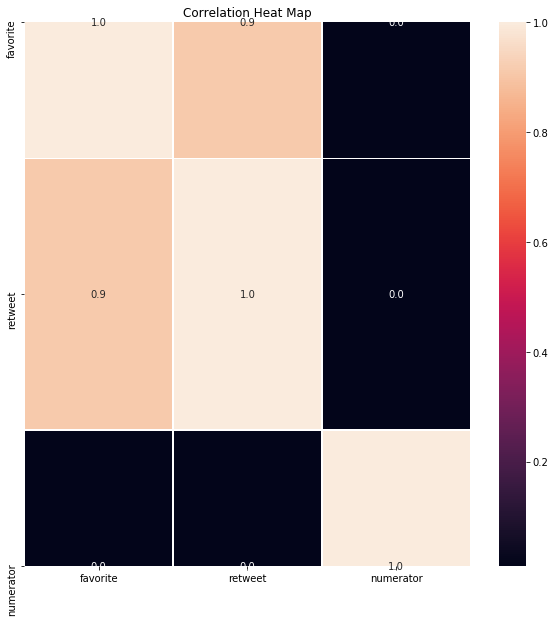

In [70]:
#By using seasborn to find the strongest correlation between columns as below:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(tw_archive_clean[['source', 'favorite','retweet',
                'numerator']].corr(), annot=True, linewidths=.5, fmt= '.1f')

plt.title('Correlation Heat Map');

# Insights:
1. The strongest relationship in the dataset features are Favorites vs Retweet
2. The relationship is positive relationship as long favorites increase as long as retweet is increase
3. Numerator do not affect any other variables

### From our findings in the last point we need to visualize this relationship favorite vs retweet.
By using matplotlib (scatter plot)

/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


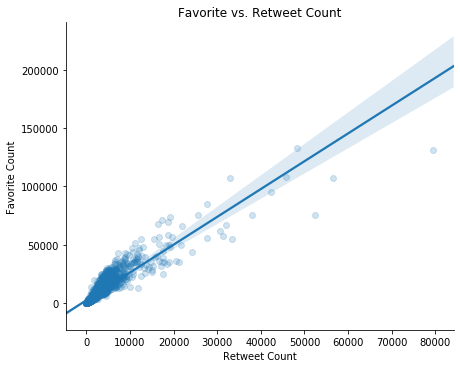

In [71]:
# Plot scatterplot of retweet vs favorite count
sns.lmplot(x="retweet", 
           y="favorite", 
           data=tw_archive_clean,
           size = 5,
           aspect=1.3,
           scatter_kws={'alpha':1/5})
plt.title('Favorite vs. Retweet Count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count');

# Category of Dog Stage if not None

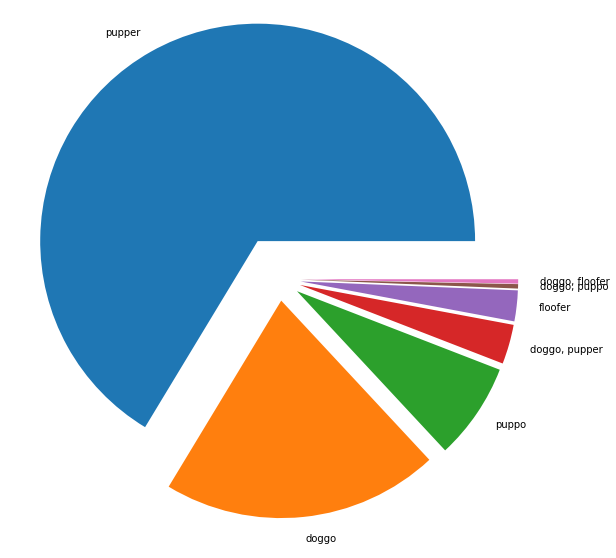

In [72]:

# Plot pie chart
dog_stage_count = list(tw_archive_clean[tw_archive_clean['dog_stage'] != '']['dog_stage'].value_counts())[0:7]
dog_stages = tw_archive_clean[tw_archive_clean['dog_stage'] != '']['dog_stage'].value_counts().index.tolist()[0:7]
explode = (0.2, 0.1, 0.1, 0.1,0.1,0.1,0.1) 

fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(dog_stage_count, explode = explode, labels = dog_stages);


In [ ]:
z